In [2]:
import numpy as np
from mpl_toolkits import mplot3d
import mpl_toolkits.mplot3d.axes3d as axes3d
from matplotlib.pyplot import savefig
import matplotlib.image as mgimg
from matplotlib import animation
from IPython.display import HTML
from scipy.interpolate import griddata
from matplotlib import cm
import glob
import sys

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import mpmath as mp
import csv

def file_reader(filename):
    with open(filename) as file:
        reader = csv.reader(file, delimiter=" ")
        data  = list(zip(*reader))
        data0 = []
        data1 = []
        data2 = []
        data3 = []
        data4 = []
        for i in range(len(data[0])):           
            data0.append(float(data[0][i]))
            data1.append(float(data[1][i]))
            data2.append(float(data[2][i]))
            data3.append(float(data[3][i]))
            data4.append(float(data[3][i]))
        return data0,data1,data2,data3,data4

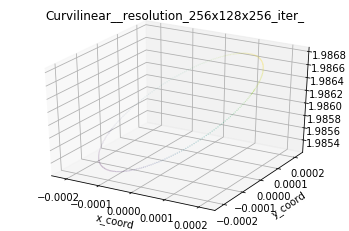

In [85]:
filename = "Curvilinear__resolution_256x128x256_iter_"
x_iter_0,y_iter_0,z_iter_0,num_0,exact_0 = file_reader(filename+"0.txt")

x = []
y = []
z = []
num = []

for i in range(len(x_iter_0)):
    if z_iter_0[i] == -5.855405e-03:
        x.append(x_iter_0[i])
        y.append(y_iter_0[i])
        z.append(z_iter_0[i])
        num.append(num_0[i])

fig = plt.figure()
#ax = fig.add_subplot(111)
#plt.gca().set_aspect('equal', adjustable='box')
ax = plt.axes(projection='3d')
ax.set_xlabel('x_coord')
ax.set_ylabel('y_coord')
#ax.set_zlabel('Numerical Soln.')
ax.set_title(filename)
ax.scatter3D(x,y,num, c=num, cmap='viridis',s=0.005)
#ax.plot_trisurf(
#    np.array(x_iter_0),np.array(y_iter_0),np.array(num_0),  cmap=plt.get_cmap('jet'),
#    linewidth=0, antialiased=False, alpha=0.5)
#ax.scatter(x,y,s=0.01)
plt.show()

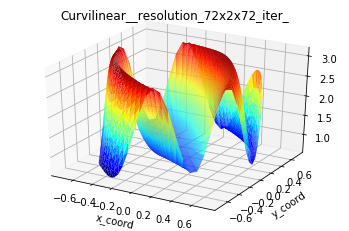

In [83]:
from mpl_toolkits.mplot3d import axes3d
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm

filename = "Curvilinear__resolution_72x2x72_iter_"
x_iter_0,y_iter_0,z_iter_0,num_0,exact_0 = file_reader(filename+"500.txt")

x = []
y = []
z = []
num = []
diag = []

for i in range(len(x_iter_0)):
#    if z_iter_0[i] == -5.855405e-03:
        x.append(x_iter_0[i])
        y.append(y_iter_0[i])
        z.append(z_iter_0[i])
        num.append(num_0[i])
#        diag.append(np.sqrt(x_iter_0[i]**2+y_iter_0[i]**2))

#x2 = []
#y2 = []
#z2 = []
#num2 = []

#for i in range(len(x_iter_0)):
#    if z_iter_0[i] == -5.855405e-03:
#        x.append(x_iter_0[i])
#        y.append(y_iter_0[i])
#        z.append(z_iter_0[i])
#        num.append(num_0[i])

fig = plt.figure()
#ax = fig.add_subplot(1,1,1)
ax = plt.axes(projection='3d')
#ax = fig.add_subplot(1,1,1, projection='3d')
ax.set_xlabel('x_coord')
ax.set_ylabel('y_coord')
#ax.set_zlabel('Numerical Soln.')
ax.set_title(filename)
ax.plot_trisurf(x,y,num,cmap=cm.jet, linewidth=0)
#ax.scatter3D(y,z,num, cmap='Greens',s=0.1)
#ax.scatter(diag,num,s=0.5)
plt.show()

In [86]:
filename = "Curvilinear__resolution_72x2x72_iter_"

itermax = 1030
i = 0
while i <= itermax:
    name = filename + str(i)
    x_iter_0,y_iter_0,z_iter_0,num_0,exact_0 = file_reader(name+".txt")
    
#    y = []
#    z = []
#    num = []

#    for j in range(len(x_iter_0)):
#        if y_iter_0[j] != 0:
#            y.append(y_iter_0[j])
#            z.append(z_iter_0[j])
#            num.append(num_0[j])
    
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.set_xlabel('x_coord')
    ax.set_ylabel('y_coord')
    ax.set_zlabel('Numerical Soln.')
    ax.set_title(filename)
    ax.plot_trisurf(x_iter_0,y_iter_0,num_0,cmap=cm.jet, linewidth=0)
    savefig(name+"_surface.png",dpi=450)
    plt.close(fig)
    i += 10

In [87]:
fig = plt.figure(frameon=False)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')

myimages = []

i = 0
while i <= itermax:
    name = filename + str(i)
    img = mgimg.imread(name+"_surface.png")
    imgplot = plt.imshow(img)
    myimages.append([imgplot])
    i += 10

ani = animation.ArtistAnimation(fig, myimages, interval=100,  repeat_delay=1000)
plt.close()
ani.save(filename+'surface_wavespeed5.mp4', fps=10,dpi=450)

In [77]:
HTML("""
    <video width="480" height="360" controls>
        <source src="Curvilinear__resolution_72x12x2_iter_surface.mp4" type="video/mp4"> 
    </video>
""")

In [78]:
HTML("""
    <video width="480" height="360" controls>
        <source src="Curvilinear__resolution_72x2x72_iter_surface.mp4" type="video/mp4"> 
    </video>
""")

In [89]:
HTML("""
    <video width="480" height="360" controls>
        <source src="Curvilinear__resolution_72x2x72_iter_surface_wavespeed5.mp4" type="video/mp4"> 
    </video>
""")

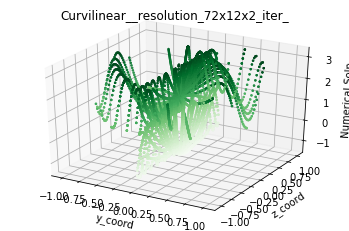

In [4]:
filename = "Curvilinear__resolution_72x12x2_iter_"
x_iter_0,y_iter_0,z_iter_0,num_0,exact_0 = file_reader(filename+"50.txt")
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('y_coord')
ax.set_ylabel('z_coord')
ax.set_zlabel('Numerical Soln.')
ax.set_title(filename)
ax.scatter3D(y_iter_0,z_iter_0,num_0, c=num_0, cmap='Greens',s=2)
plt.show()


itermax = 1990
i = 0
while i <= itermax:
    name = filename + str(i)
    x_iter_0,y_iter_0,z_iter_0,num_0,exact_0 = file_reader(name+".txt")
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.set_xlabel('y_coord')
    ax.set_ylabel('z_coord')
    ax.set_zlabel('Numerical Soln.')
    ax.set_title(filename)
    ax.scatter3D(y_iter_0,z_iter_0,num_0, c=num_0, cmap='Greens',s=3)
    savefig(name+".png",dpi=450)
    plt.close(fig)
    i += 10

In [5]:
fig = plt.figure(frameon=False)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')

myimages = []

i = 0
while i <= itermax:
    name = filename + str(i)
    img = mgimg.imread(name+".png")
    imgplot = plt.imshow(img)
    myimages.append([imgplot])
    i += 10

ani = animation.ArtistAnimation(fig, myimages, interval=100,  repeat_delay=1000)
plt.close()
ani.save(filename+'.mp4', fps=15,dpi=450)


HTML("""
    <video width="480" height="360" controls>
        <source src="Curvilinear__resolution_72x12x2_iter_.mp4" type="video/mp4"> 
    </video>
""")

KeyboardInterrupt: 

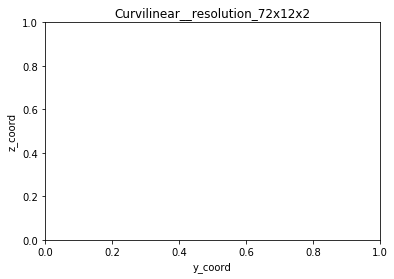

In [26]:
globby = glob.glob('Curvilinear__resolution_72x12x2_iter_*.txt')
file_list = []
for x in sorted(globby):
    file_list.append(x)

bound=1
pl_xmin = -bound
pl_xmax = +bound
pl_ymin = -bound
pl_ymax = +bound

for filename in file_list:
    fig = plt.figure()
    out,x,y,num,exact = np.loadtxt(filename).T #Transposed for easier unpacking

    plotquantity = num
    plotdescription = "Numerical Soln."
    plt.title("Curvilinear__resolution_72x12x2")
    plt.xlabel("y_coord")
    plt.ylabel("z_coord")

    grid_x, grid_y = np.mgrid[pl_xmin:pl_xmax:300j, pl_ymin:pl_ymax:300j]
    points = np.zeros((len(x), 2))
    for i in range(len(x)):
        points[i][0] = y[i]
        points[i][1] = x[i]

    grid = griddata(points, plotquantity, (grid_x, grid_y), method='nearest')
    gridcub = griddata(points, plotquantity, (grid_x, grid_y), method='cubic')
    im = plt.imshow(gridcub, extent=(pl_xmin,pl_xmax, pl_ymin,pl_ymax))
    ax = plt.colorbar()
    ax.set_label(plotdescription)
    savefig(filename+"_2D.png",dpi=150)
    plt.close(fig)

In [ ]:
fig = plt.figure(frameon=False)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')

myimages = []

for i in range(len(file_list)):
    img = mgimg.imread(file_list[i]+"_2D.png")
    imgplot = plt.imshow(img)
    myimages.append([imgplot])

ani = animation.ArtistAnimation(fig, myimages, interval=100,  repeat_delay=1000)
plt.close()
ani.save('Curvilinear__resolution_72x12x2_2D.mp4', fps=5,dpi=150)

%%HTML
<video width="480" height="360" controls>
  <source src="BH_Head-on_Collision.mp4" type="video/mp4">
</video>